In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generar datos simulados
np.random.seed(42)
n_samples = 1000
mouse = np.random.normal(0, 1, (n_samples, 20))
keyboard = np.random.normal(1, 1, (n_samples, 20))
monitor = np.random.normal(2, 1, (n_samples, 20))

X = np.vstack((mouse, keyboard, monitor))
y = np.hstack((
    np.zeros(n_samples),
    np.ones(n_samples),
    np.full(n_samples, 2)
))

# Mezclar los datos
indices = np.arange(n_samples * 3)
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Definir el modelo
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(20,))) # Input shape matches your data
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax')) # 3 output classes

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5150 - loss: 0.9299 - val_accuracy: 0.8900 - val_loss: 0.4103
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9026 - loss: 0.3358 - val_accuracy: 0.9433 - val_loss: 0.2296
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9498 - loss: 0.1894 - val_accuracy: 0.9533 - val_loss: 0.1701
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9584 - loss: 0.1356 - val_accuracy: 0.9633 - val_loss: 0.1410
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9463 - loss: 0.1300 - val_accuracy: 0.9550 - val_loss: 0.1345
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9643 - loss: 0.1005 - val_accuracy: 0.9550 - val_loss: 0.1302
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9711 - loss: 0.0781 - val_accuracy: 0.9600 - val_loss: 0.1260
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9739 - loss: 0.0735 - val_accuracy: 0.9667 - val_loss

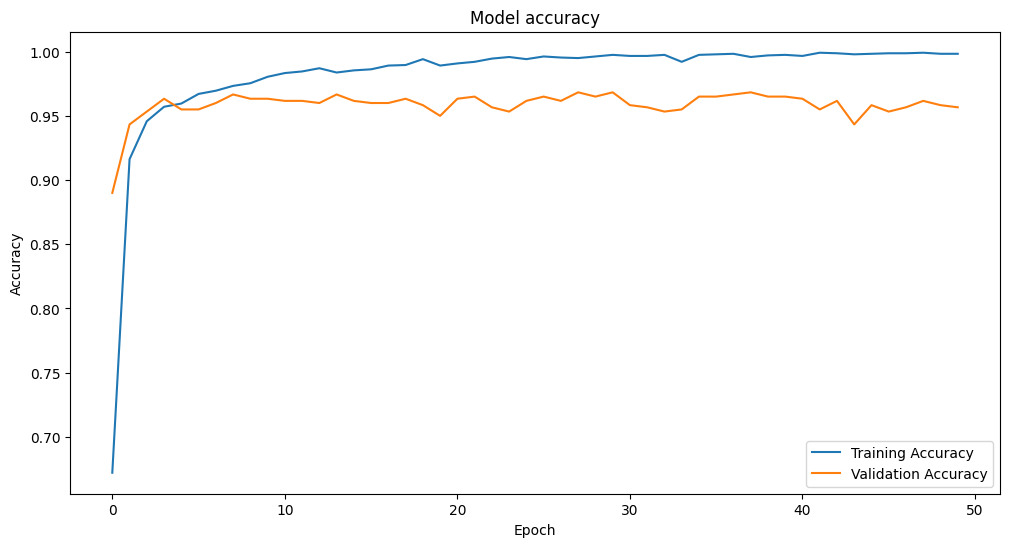

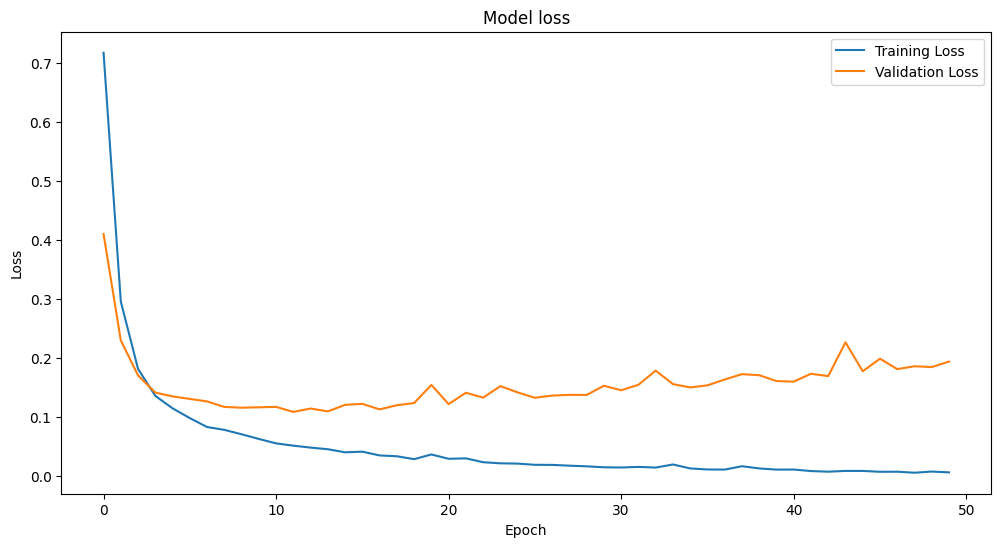

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9979 - loss: 0.0062 - val_accuracy: 0.9583 - val_loss: 0.1885
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9996 - loss: 0.0040 - val_accuracy: 0.9617 - val_loss: 0.2030
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9977 - loss: 0.0090 - val_accuracy: 0.9650 - val_loss: 0.1709
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9986 - loss: 0.0049 - val_accuracy: 0.9633 - val_loss: 0.1920
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9999 - loss: 0.0031 - val_accuracy: 0.9567 - val_loss: 0.2027
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.9650 - val_loss: 0.1883
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9996 - loss: 0.0029 - val_accuracy: 0.9500 - val_loss: 0.2188
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9999 - loss: 0.0052 - val_accuracy: 0.9600 - v

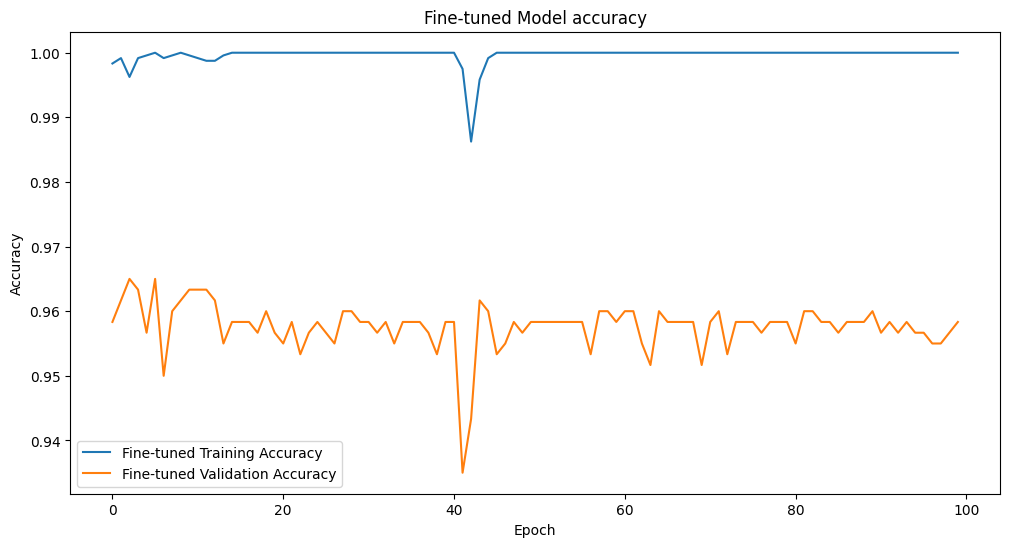

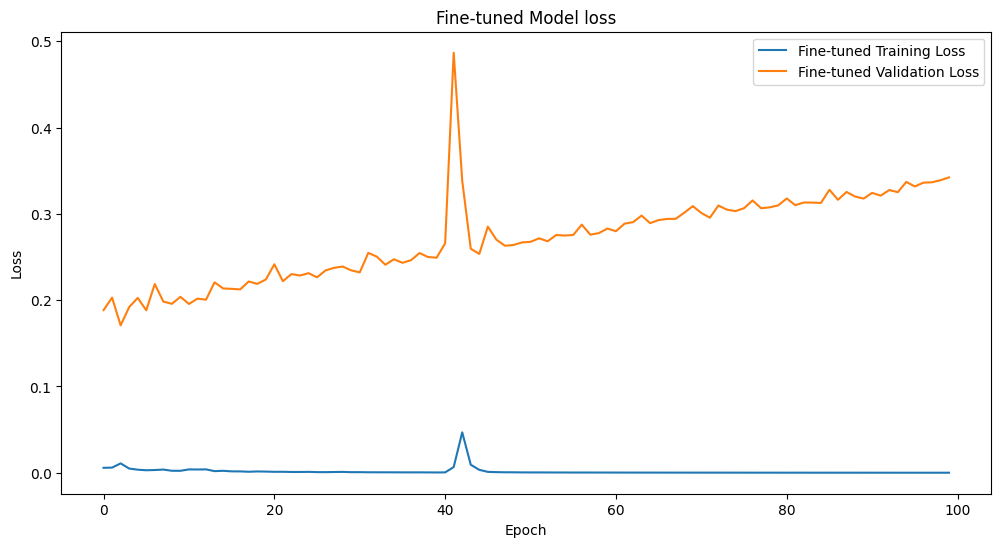

In [6]:
history_fine_tuned = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

plt.figure(figsize=(12, 6))
plt.plot(history_fine_tuned.history['accuracy'], label='Fine-tuned Training Accuracy')
plt.plot(history_fine_tuned.history['val_accuracy'], label='Fine-tuned Validation Accuracy')
plt.title('Fine-tuned Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history_fine_tuned.history['loss'], label='Fine-tuned Training Loss')
plt.plot(history_fine_tuned.history['val_loss'], label='Fine-tuned Validation Loss')
plt.title('Fine-tuned Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [7]:
# Predicciones aleatorias
random_indices = np.random.choice(len(X_test), size=10, replace=False)
for i in random_indices:
    prediction = model.predict(X_test[i:i+1])
    print(f"Predicción para muestra {i}:")
    print("Clases:", ["Mouse", "Teclado", "Monitor"])
    print("Probabilidades:", prediction[0])
    print("---")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Predicción para muestra 261:
Clases: ['Mouse', 'Teclado', 'Monitor']
Probabilidades: [4.1115800e-29 1.3755522e-15 1.0000000e+00]
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicción para muestra 442:
Clases: ['Mouse', 'Teclado', 'Monitor']
Probabilidades: [5.2545737e-24 2.8635910e-11 1.0000000e+00]
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicción para muestra 391:
Clases: ['Mouse', 'Teclado', 'Monitor']
Probabilidades: [9.999137e-01 8.625632e-05 8.736712e-25]
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicción para muestra 41:
Clases: ['Mouse', 'Teclado', 'Monitor']
Probabilidades: [1.3551666e-08 1.0000000e+00 1.0052802e-11]
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicción para muestra 133:
Clases: ['Mouse', 'Teclado', 'Monitor']
Probabilidades: [5.7286324e-28 1.7088368e-14 1.0000000e+00]
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicción para muestra 429:
Clases: ['Mouse', 'Teclado', 'Monitor']
Probabilidades: [1.0000000e+00 1.4386215e